# Lesson 2 - Space & Time

## Notes:
* We gon' mess with grid sizing!! :D

## Code: 
all the code will follow this cell. This is to ease runtime and to make sure the scope of all variables remains the same. different iterations of the same code with different values or methods of computing the same solution will be in subsquent cells, while code-notes will be commented like usual.

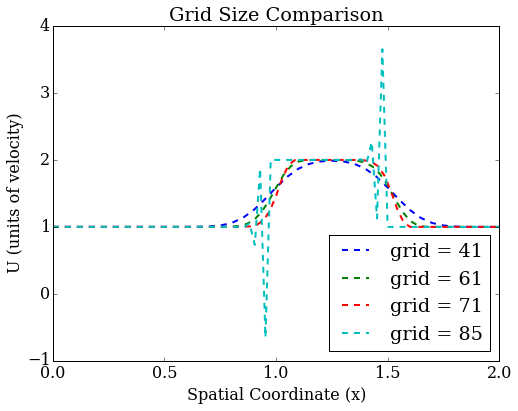

In [8]:
'''going to create a linear convection function to mess with
grid size only. While the notebook has each different grid
size plotted, it makes more sense to plot everything on one
big plot to see the various changes.'''

import numpy
from matplotlib import pyplot, rcParams
%matplotlib inline
rcParams['font.family']='serif'
rcParams['font.size']=16

##creating function to accept only grid size as parameters
def lin_con(nx):
    '''solve the linear convection equation:
    
    solves the equation d_t u + c d_x u = 0 where 
    * the wavespeed c is set to 1
    * the domain is x \in [0, 2]
    * 20 timesteps are taken, with \Delta t = 0.025
    * the initial data is the hat function
    
    Produces a plot of the results
    
    Parameters
    ----------
    
    nx : integer
        number of internal grid points
        
    Returns
    -------
    
    u : vector
        vector of solved values'''
    
    xdom = 2
    dx = xdom/(nx-1)
    nt = 20    
    dt = .025  
    c = 1
    
    x = numpy.linspace(0,xdom,nx)

    u = numpy.ones(nx)
    u[numpy.intersect1d(numpy.where(x>=.5),
                        numpy.where(x<=1))]=2

    un = numpy.ones(nx) 

    for n in range(nt): 
        un = u.copy() 
        u[1:] = un[1:] -c*dt/dx*(un[1:] -un[0:-1]) 
        u[0] = 1.0
    return (x,u)

#create different grid sizes
(x41,u41)=lin_con(41)
(x61,u61)=lin_con(61)
(x71,u71)=lin_con(71)
(x85,u85)=lin_con(85)

# Visualize
pyplot.figure(figsize=(8,6))
pyplot.title('Grid Size Comparison')
pyplot.ylabel('U (units of velocity)')
pyplot.xlabel('Spatial Coordinate (x)')
pyplot.plot(x41,u41,ls='--',lw=2)
pyplot.plot(x61,u61,ls='--',lw=2)
pyplot.plot(x71,u71,ls='--',lw=2)
pyplot.plot(x85,u85,ls='--',lw=2)
pyplot.legend(['grid = 41','grid = 61',
               'grid = 71', 'grid = 85'], loc='lower right')